# Data Understanding

## Overview
This dataset pertains to direct marketing campaigns conducted by a Portuguese banking institution. These campaigns involved contacting clients via phone calls. Often, multiple contacts with the same client were needed to ascertain whether they would subscribe to the bank's term deposit.

The goal is to predict whether the client will subscribe to a term deposit (target variable `y`).

## Data Dictionary

### Input Variables

#### Client Data
1. **age** (numeric): Client's age.
2. **job** (categorical): Job category.
    - Possible values: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'
3. **marital** (categorical): Marital status.
    - Possible values: 'divorced', 'married', 'single', 'unknown'
    - Note: 'divorced' includes divorced and widowed individuals.
4. **education** (categorical): Level of education.
    - Possible values: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'
5. **default** (categorical): Whether the client has credit in default.
    - Possible values: 'no', 'yes', 'unknown'
6. **balance** (numeric): Account balance.
7. **housing** (categorical): Whether the client has a housing loan.
    - Possible values: 'no', 'yes', 'unknown'
8. **loan** (categorical): Whether the client has a personal loan.
    - Possible values: 'no', 'yes', 'unknown'

#### Last Contact Data
9. **contact** (categorical): Type of contact communication.
    - Possible values: 'cellular', 'telephone'
10. **day** (numeric): Day of the month of the last contact (1-31).
11. **month** (categorical): Month of the last contact.
    - Possible values: 'jan', 'feb', 'mar', ..., 'nov', 'dec'
12. **duration** (numeric): Duration of the last contact in seconds.
    - Note: This feature significantly affects the target variable (e.g., if duration=0 then y='no'). However, this value is not known before the call is made. Post-call, the target outcome `y` is known. Therefore, use this feature for benchmarking purposes only, and exclude it for realistic predictive modeling.

#### Additional Attributes
13. **campaign** (numeric): Number of contacts made during the campaign for this client (includes the last contact).
14. **pdays** (numeric): Number of days since the client was last contacted in a previous campaign (999 indicates no prior contact).
15. **previous** (numeric): Number of contacts made before this campaign for this client.
16. **poutcome** (categorical): Outcome of the previous marketing campaign.
    - Possible values: 'failure', 'nonexistent', 'success','unknown'

### Output Variable (Target)
17. **y** (binary): Whether the client has subscribed to a term deposit.
    - Possible values: 'yes', 'no'


# 1.Data Handling

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('bank.csv')

# Displaying the first few rows of the dataframe
data.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
# Define the schema
schema = {
    'age': int,
    'job': str,
    'marital': str,
    'education': str,
    'default': str,
    'balance': int,
    'housing': str,
    'loan': str,
    'contact': str,
    'day': int,
    'month': str,
    'duration': int,
    'campaign': int,
    'pdays': int,
    'previous': int,
    'poutcome': str,
    'y': str
}

schema

{'age': int,
 'job': str,
 'marital': str,
 'education': str,
 'default': str,
 'balance': int,
 'housing': str,
 'loan': str,
 'contact': str,
 'day': int,
 'month': str,
 'duration': int,
 'campaign': int,
 'pdays': int,
 'previous': int,
 'poutcome': str,
 'y': str}

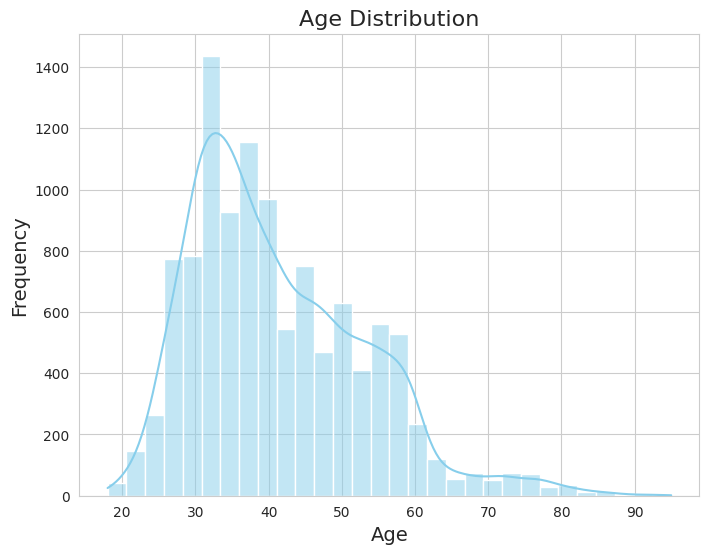

In [3]:
# plotting data before pre-processing
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting the data
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')

# Adding titles and labels
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


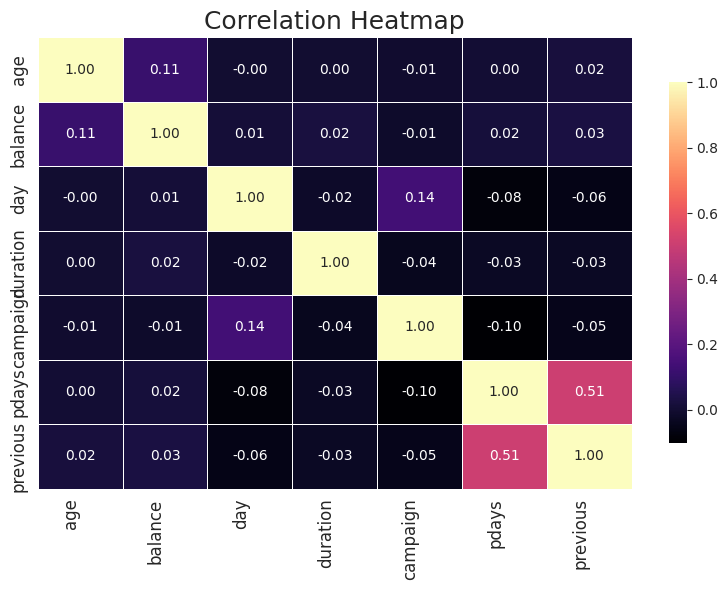

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
numerical_data = data.select_dtypes(include=[float, int])
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma', linewidths=0.5, cbar_kws={"shrink": .8})

# Adding title and adjusting layout
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


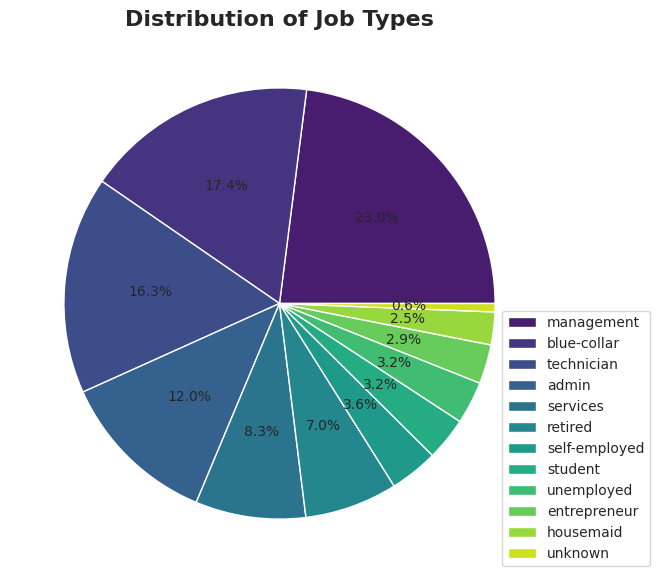

In [5]:
import matplotlib.pyplot as plt

# Calculate the distribution
job_distribution = data['job'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 7))
plt.pie(job_distribution, autopct='%1.1f%%',colors=sns.color_palette('viridis', len(job_distribution)))
plt.title('Distribution of Job Types', fontsize=16, fontweight='bold')
plt.legend(job_distribution.index, loc='lower right', bbox_to_anchor=(1.2,0,0, 0.5))


plt.show()


<ipython-input-6-5e8dbeac97e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['poutcome'], palette='cubehelix')


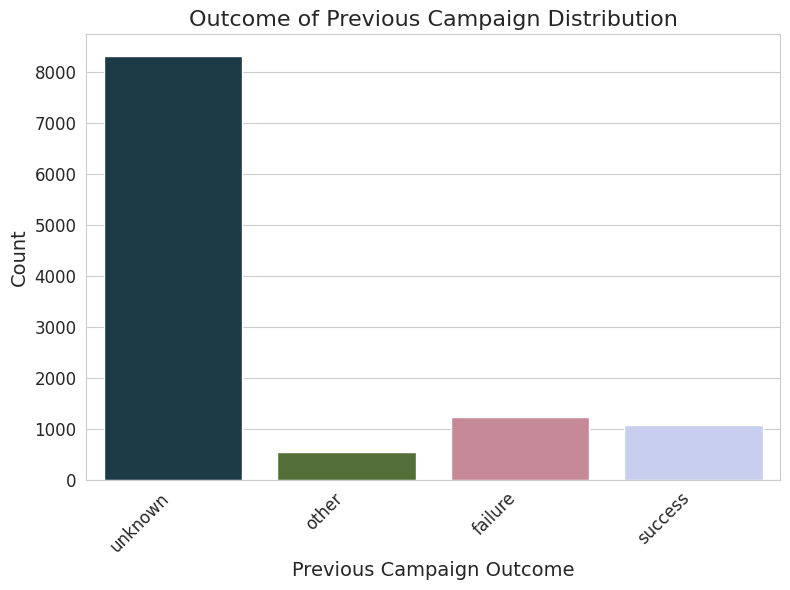

In [6]:
# Plot a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=data['poutcome'], palette='cubehelix')
plt.title('Outcome of Previous Campaign Distribution', fontsize=16)
plt.xlabel('Previous Campaign Outcome', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


<ipython-input-7-811f635b4ac6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['loan'], palette='husl')


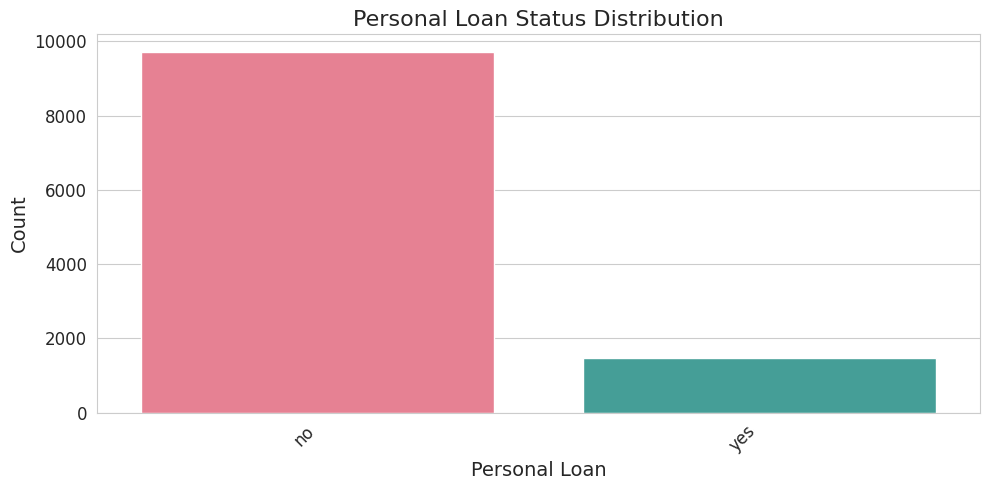

In [7]:
# Plot a countplot
plt.figure(figsize=(10, 5))
sns.countplot(x=data['loan'], palette='husl')
plt.title('Personal Loan Status Distribution', fontsize=16)
plt.xlabel('Personal Loan', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


<ipython-input-8-4ca9e20e3211>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['housing'], palette='Paired')


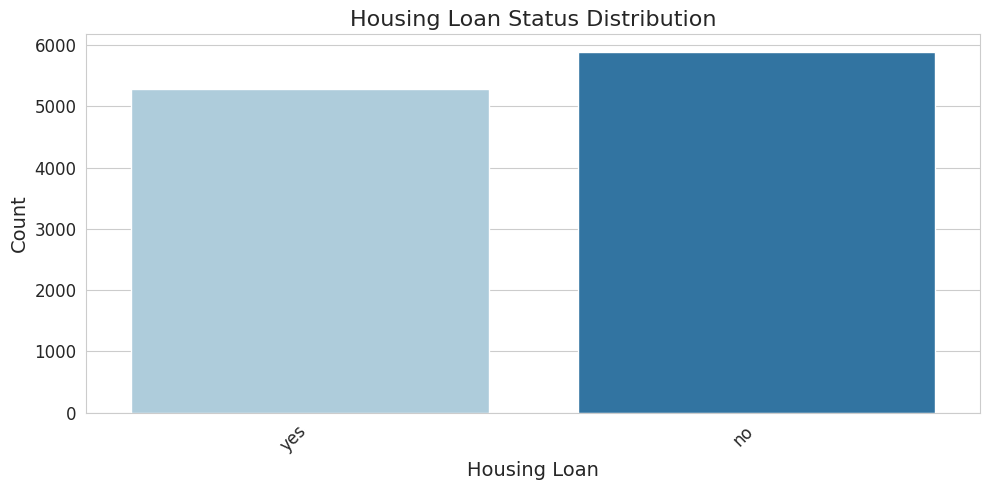

In [8]:
# Plot a countplot
plt.figure(figsize=(10, 5))
sns.countplot(x=data['housing'], palette='Paired')
plt.title('Housing Loan Status Distribution', fontsize=16)
plt.xlabel('Housing Loan', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


<ipython-input-9-064a8b7c0dcb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=education_distribution.index, x=education_distribution.values, palette='pastel')


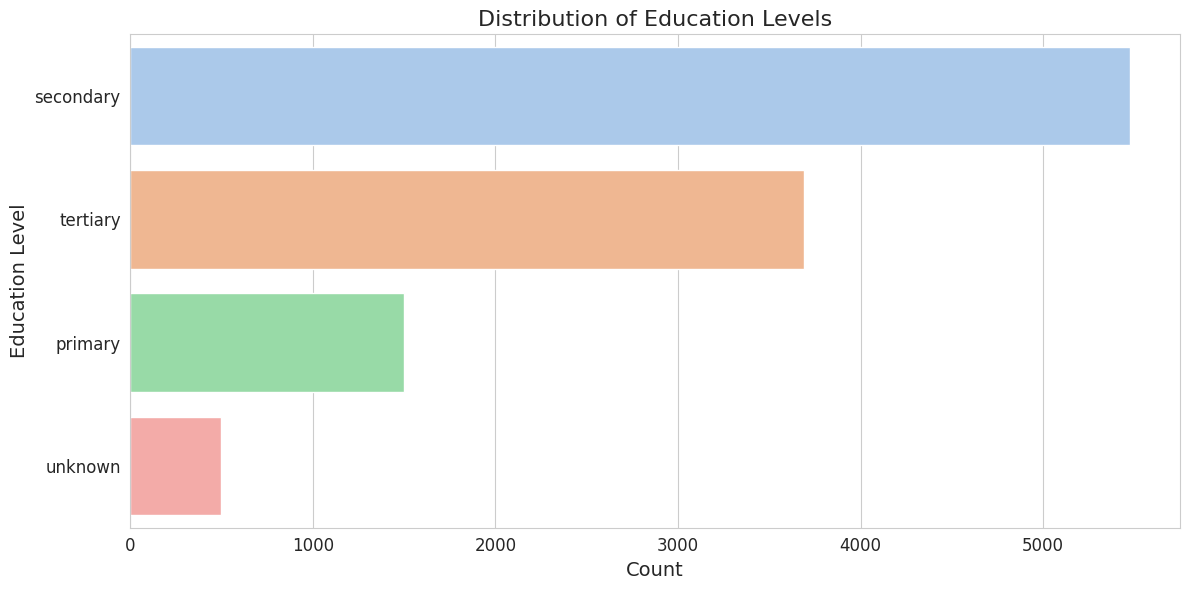

In [9]:
# Calculate the distribution
education_distribution = data['education'].value_counts()

# Plot a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(y=education_distribution.index, x=education_distribution.values, palette='pastel')
plt.title('Distribution of Education Levels', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Education Level', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


<ipython-input-10-70367cf8dce4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['default'], palette='Set2')


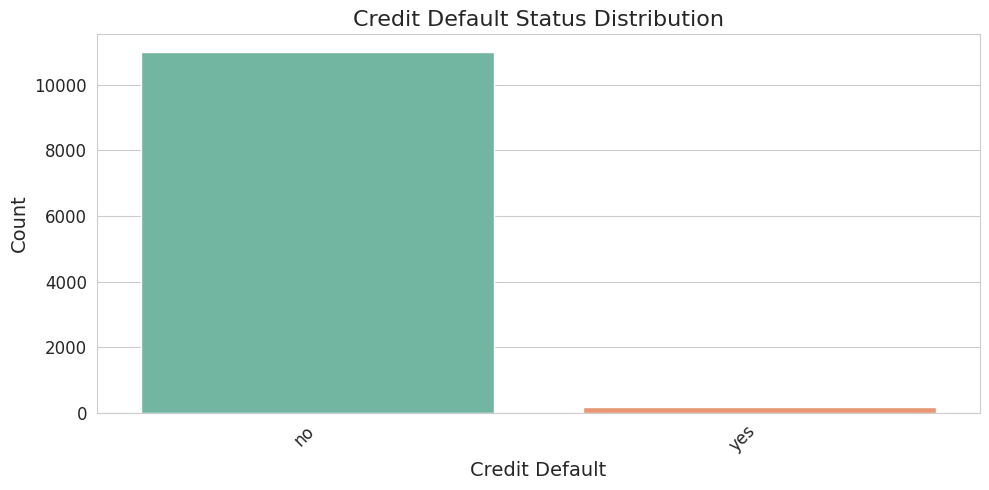

In [10]:
# Plot a countplot
plt.figure(figsize=(10, 5))
sns.countplot(x=data['default'], palette='Set2')
plt.title('Credit Default Status Distribution', fontsize=16)
plt.xlabel('Credit Default', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


<ipython-input-11-de7a15121d94>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis', hue=None)


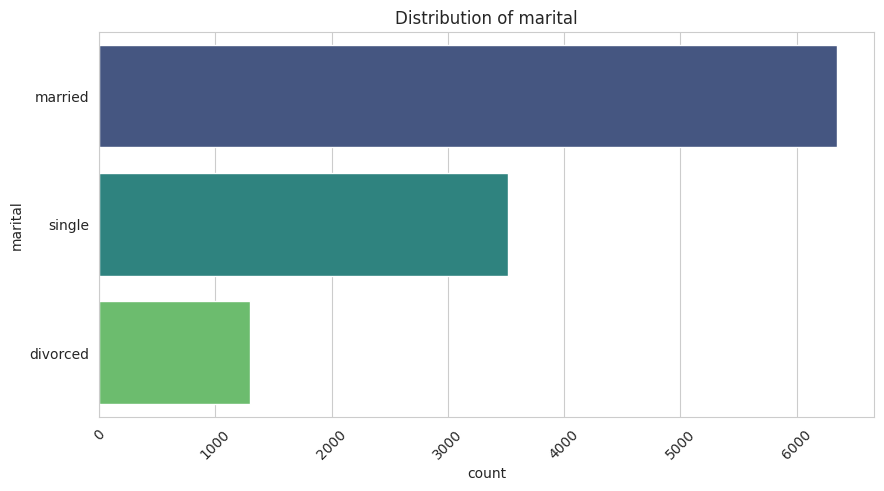

<ipython-input-11-de7a15121d94>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis', hue=None)


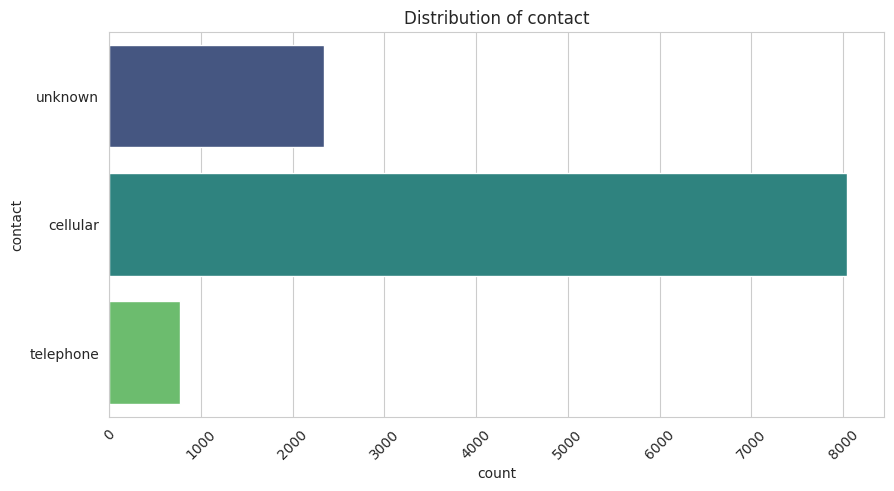

<ipython-input-11-de7a15121d94>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis', hue=None)


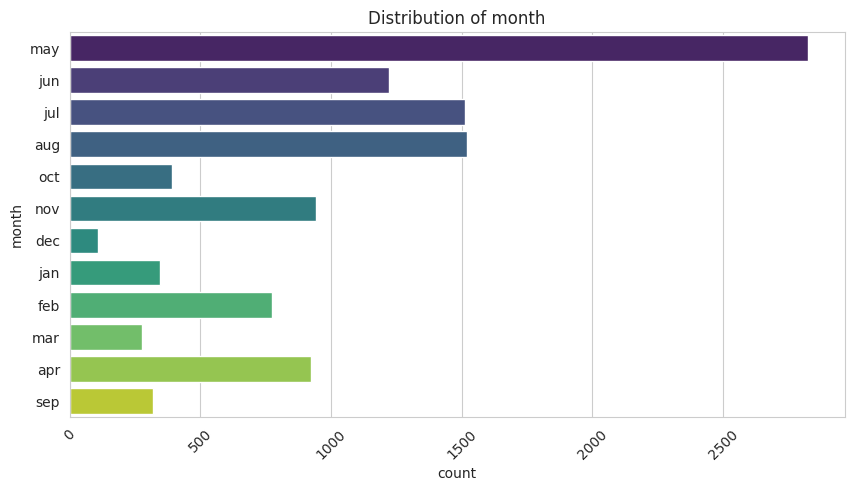

In [11]:
import seaborn as sns

# Plotting the distribution of categorical variables
categorical_columns = ['marital',  'contact', 'month']

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data[column], palette='viridis', hue=None)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


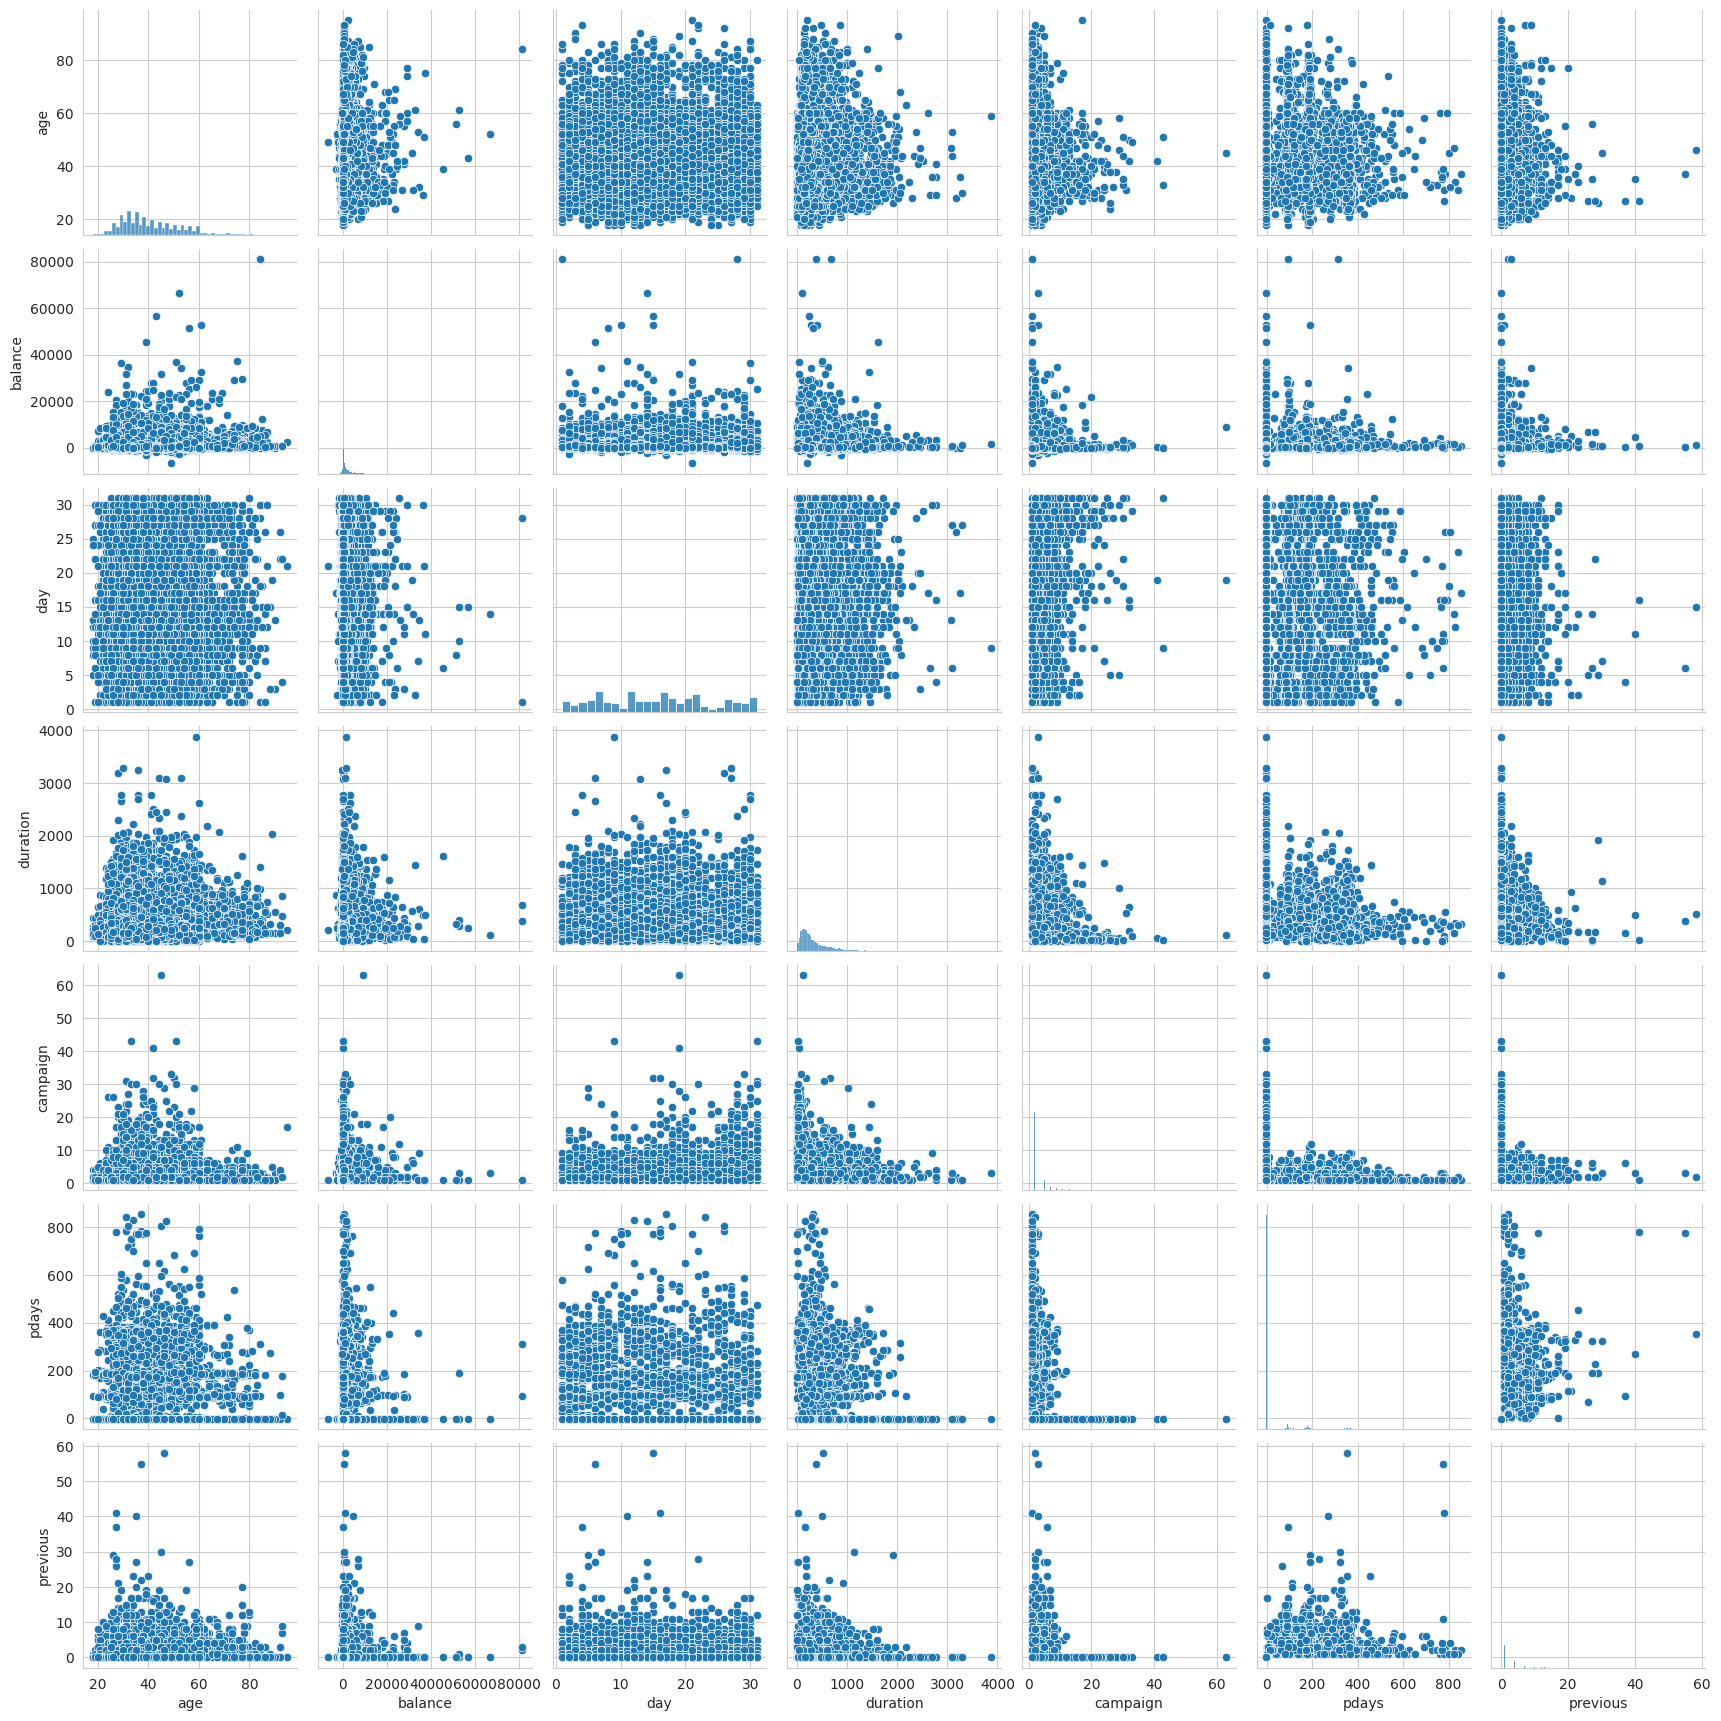

In [12]:
# Pair plot of numerical features
sns.pairplot(data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']])
plt.show()


# 2.Data Pre-processing

In [13]:
# Checking the dimensions of the dataset (number of rows and columns)
dimensions = data.shape
print("Dimensions:", dimensions)


Dimensions: (11162, 17)


In [14]:
# Describing the dataset to get an overview of the statistics
description = data.describe(include='all')
print("Data Description:\n", description)


Data Description:
                  age         job  marital  education default       balance  \
count   11162.000000       11162    11162      11162   11162  11162.000000   
unique           NaN          12        3          4       2           NaN   
top              NaN  management  married  secondary      no           NaN   
freq             NaN        2566     6351       5476   10994           NaN   
mean       41.231948         NaN      NaN        NaN     NaN   1528.538524   
std        11.913369         NaN      NaN        NaN     NaN   3225.413326   
min        18.000000         NaN      NaN        NaN     NaN  -6847.000000   
25%        32.000000         NaN      NaN        NaN     NaN    122.000000   
50%        39.000000         NaN      NaN        NaN     NaN    550.000000   
75%        49.000000         NaN      NaN        NaN     NaN   1708.000000   
max        95.000000         NaN      NaN        NaN     NaN  81204.000000   

       housing   loan   contact           da

In [15]:
# Checking for missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [16]:
# Checking for duplicate rows
duplicates = data.duplicated().sum()
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


In [17]:
# Installing PySpark
!pip install pyspark
# Importing SparkSession after installation
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('bank_pyspark').getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=d52437e1b7d2e8a3ee93bc61c450d3277693f2fc591eff0d3281a5353859c80b
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [18]:
# Loading data using Pyspark
df = spark.read.csv('bank.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [19]:
# Printing schema using pyspark
df = df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')
cols = df.columns
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



# 3.Encoding Categorical variables
    1. Category Indexing
    2. One-Hot Encoding
    3. VectorAssembler - a feature transformer that merges multiple columns into a vector column.

In [20]:
# 1. Category Indexing &2. One-Hot Encoding
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
stages = []


for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]

In [21]:
# 3. VectorAssembler
numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

1. indexes each categorical column using the StringIndexer,
2. then converts the indexed categories into one-hot encoded variables. The resulting output has the binary vectors appended to the end of each row.
3. We use the StringIndexer again to encode our labels to label indices.
4. Next, we use the VectorAssembler to combine all the feature columns into a single vector column.

In [22]:
stages

[StringIndexer_1e81e44662a8,
 OneHotEncoder_c1fcc4bb5def,
 StringIndexer_f9ce5dca651e,
 OneHotEncoder_ab5d94252985,
 StringIndexer_e156937f2f20,
 OneHotEncoder_722d9669aa6c,
 StringIndexer_b795b10e0e7c,
 OneHotEncoder_233a2adb6c36,
 StringIndexer_81351bc38194,
 OneHotEncoder_ef0756e623a4,
 StringIndexer_c3b984045d35,
 OneHotEncoder_0f925d8a50e0,
 StringIndexer_3d393d19286b,
 OneHotEncoder_bd6fc520fffb,
 StringIndexer_9ccb0735413e,
 OneHotEncoder_588d9387b855,
 StringIndexer_6bb2f9d138bd,
 VectorAssembler_969a0d2c2638]

- Binary Classification Labels:
    - 1 = Yes, client has subscribed to a term deposit
    - 0 = No, client did not subscribe to a term deposit

# 4. Model Building

### We create a pipeline

In [23]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [24]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,1.0,1.0,1.0,1.0,1.0
features,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
age,59,56,41,55,54
job,admin,admin,technician,services,admin
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no


In [25]:
# we now have 'features' & 'label' columns

# We train-test-split usng randomSplit
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7855
Test Dataset Count: 3307


# Modeling

## 1. Logistic Regression

In [26]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

In [27]:
lrModel.coefficients

DenseVector([-0.1068, -0.1047, -0.0285, 0.2241, -0.1279, 0.6901, -0.2433, 0.8962, 0.1015, -0.3754, -0.1607, -0.2694, 0.0268, -0.0742, 0.2763, -0.4079, 0.1039, 0.7979, 0.5872, 0.0226, -1.2719, -0.5182, -0.067, 2.1426, 0.0017, 0.0, 0.0052, -0.114, -0.0003, 0.016])

### Make Predictions on Test set

In [28]:
predictions_lr = lrModel.transform(test)
predictions_lr.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(30)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 33|management|  0.0|[1.93084854518128...|       0.0|[0.87334331124860...|
| 49|management|  0.0|[1.92783695472097...|       0.0|[0.87300981013433...|
| 52|management|  0.0|[-0.7737627890181...|       1.0|[0.31566570209267...|
| 53|management|  0.0|[0.94708137344074...|       0.0|[0.72052784002179...|
| 58|management|  0.0|[2.44657764692457...|       0.0|[0.92031082026376...|
| 32|management|  0.0|[1.28386077546037...|       0.0|[0.78310624913886...|
| 57|management|  0.0|[1.05745870556531...|       0.0|[0.74220460119091...|
| 52|management|  0.0|[3.25200815517462...|       0.0|[0.96274520587479...|
| 46|management|  0.0|[2.24978402804239...|       0.0|[0.90463190417562...|
| 31|management|  0.0|[1.47121751117284...|       0.0|[0.81324237120150...|
| 50|managem

In [29]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions_lr))

Test Area Under ROC 0.885643189559481


### Tuning Model Parameters with ParaGridBuilder & Cross Validator

In [30]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())

cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train)
predictions_lr = cvModel.transform(test)
print('Test Area Under ROC', evaluator.evaluate(predictions_lr))

Test Area Under ROC 0.8844768025913865


## 2. Decision Tree
    - easy to interpret
    - can handle categorical features
    - can handle multiclass classification
    - feature scaling not necessary
    - can capture non-linearities and feature interactions

In [31]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions_dt = dtModel.transform(test)
predictions_dt.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------+----------+--------------------+
|age|       job|label| rawPrediction|prediction|         probability|
+---+----------+-----+--------------+----------+--------------------+
| 33|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 49|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 52|management|  0.0|[520.0,1931.0]|       1.0|[0.21215830273357...|
| 53|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 58|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 32|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 57|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 52|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 46|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 31|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
+---+----------+-----+--------------+----------+--------------------+
only showing top 10 

In [32]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions_dt, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7808118726917547


- Decision Tree Classifier is little bit less effective than the Logistic Regression above in this particular problem

## 3. Random Forest Classifier

In [33]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions_rf = rfModel.transform(test)
predictions_rf.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 33|management|  0.0|[14.6460791001170...|       0.0|[0.73230395500585...|
| 49|management|  0.0|[14.2916742258748...|       0.0|[0.71458371129374...|
| 52|management|  0.0|[7.44388175226404...|       1.0|[0.37219408761320...|
| 53|management|  0.0|[12.6951736210575...|       0.0|[0.63475868105287...|
| 58|management|  0.0|[14.6717135272190...|       0.0|[0.73358567636095...|
| 32|management|  0.0|[13.7548315974554...|       0.0|[0.68774157987277...|
| 57|management|  0.0|[13.2913981800103...|       0.0|[0.66456990900051...|
| 52|management|  0.0|[16.6748410949639...|       0.0|[0.83374205474819...|
| 46|management|  0.0|[16.4807208381610...|       0.0|[0.82403604190805...|
| 31|management|  0.0|[15.5849352264609...|       0.0|[0.77924676132304...|
+---+-------

In [34]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions_rf, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8787255922727034


##### Random Forest Parameter explanations

In [35]:
print(rf.explainParams())

bootstrap: Whether bootstrap samples are used when building trees. (default: True)
cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the featur

## 4. Gradient-boosted Tree Classifier

In [36]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions_gbt = gbtModel.transform(test)
predictions_gbt.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 33|management|  0.0|[0.94992370947246...|       0.0|[0.86987425549896...|
| 49|management|  0.0|[1.28281748604659...|       0.0|[0.92861688965145...|
| 52|management|  0.0|[-0.5021429054421...|       1.0|[0.26809961471379...|
| 53|management|  0.0|[0.09646513340517...|       0.0|[0.54808351175538...|
| 58|management|  0.0|[1.05831377292163...|       0.0|[0.89250881497055...|
| 32|management|  0.0|[0.57268875896254...|       0.0|[0.75866558918304...|
| 57|management|  0.0|[0.34932946844840...|       0.0|[0.66789037418062...|
| 52|management|  0.0|[1.33264456943866...|       0.0|[0.93494709840561...|
| 46|management|  0.0|[1.28262818068783...|       0.0|[0.92859178839697...|
| 31|management|  0.0|[1.16094954405484...|       0.0|[0.91067454521219...|
+---+-------

In [37]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions_gbt, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8935091626908479


- Gradient-boosted Tree achieved the best result at ROC-AUC Score of 0.89,
- Let's try tuning this model with the ParamGridBuilder and the CrossValidator.
- we can use explainParams() to print a list of all params and their definitions to understand what params available for tuning.

#### Tuning Gradient Boosted Tree Model with ParamGridBuilder and CrossValidator

In [38]:
print(gbt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

In [39]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train)
predictions_gbt = cvModel.transform(test)
print('Test Area Under ROC', evaluator.evaluate(predictions_gbt))

Test Area Under ROC 0.8954659543871663


Logistic Regression - Accuracy: 0.7940731781070457
Logistic Regression - Precision: 0.8288159771754636
Logistic Regression - Recall: 0.7248908296943232
Logistic Regression - F1-Score: 0.7733777038269551
Logistic Regression - Confusion Matrix: 
[[1464  240]
 [ 441 1162]]
Logistic Regression - AUROC: 0.8844768025913865
Decision Tree - Accuracy: 0.7713940127003326
Decision Tree - Precision: 0.7211488250652741
Decision Tree - Recall: 0.8615096693699313
Decision Tree - F1-Score: 0.7851051733939737
Decision Tree - Confusion Matrix: 
[[1170  534]
 [ 222 1381]]
Decision Tree - AUROC: 0.8104965308590992
Random Forest - Accuracy: 0.805563955246447
Random Forest - Precision: 0.7966625463535228
Random Forest - Recall: 0.8041172800998129
Random Forest - F1-Score: 0.8003725551071096
Random Forest - Confusion Matrix: 
[[1375  329]
 [ 314 1289]]
Random Forest - AUROC: 0.8787255922727034
Gradient Boosting - Accuracy: 0.8209857877230118
Gradient Boosting - Precision: 0.8149532710280374
Gradient Boosting

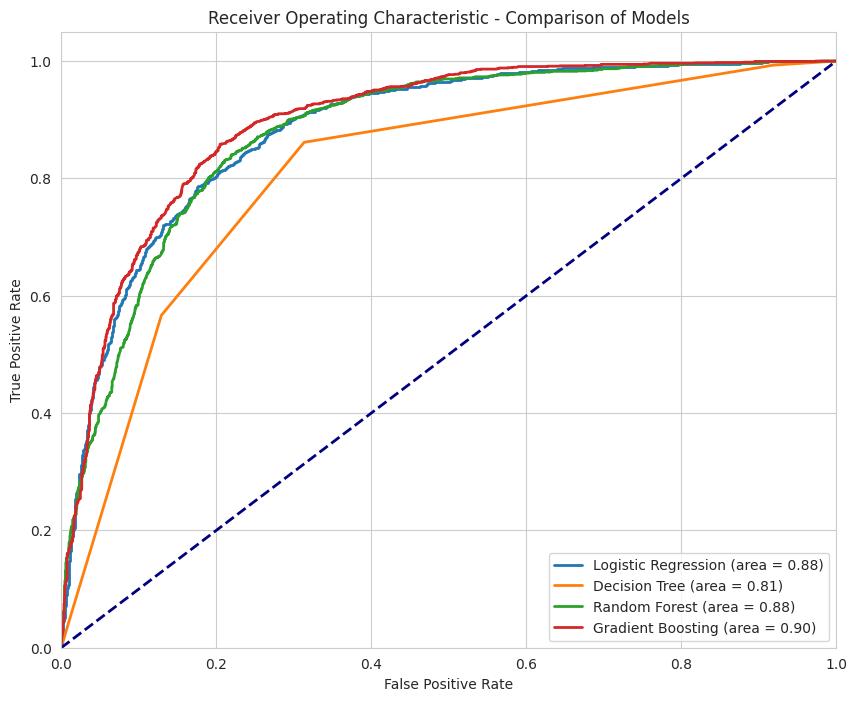


The best model based on recall is: Decision Tree with a recall of 0.86


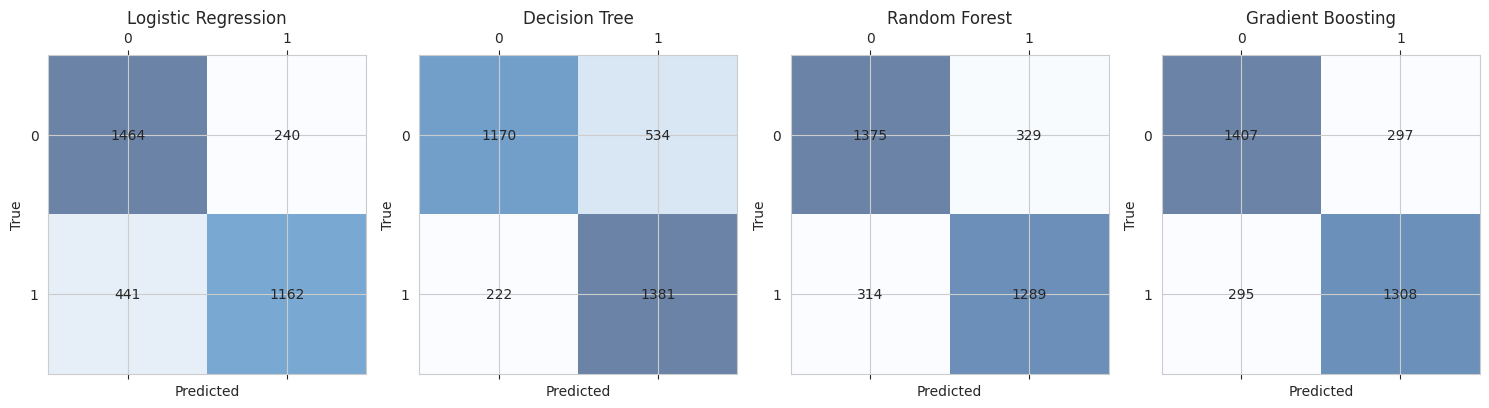

In [40]:
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, confusion_matrix
import numpy as np

# Function to collect labels and probabilities from predictions
def collect_labels_and_probs(predictions):
    y_true = [int(row['label']) for row in predictions.select("label").collect()]
    y_prob = [float(row['probability'][1]) for row in predictions.select("probability").collect()]
    return y_true, y_prob

# Function to evaluate models, plot ROC curves, and determine the best model
def evaluate_and_plot_roc(models_predictions, model_names, metric):
    plt.figure(figsize=(10, 8))

    best_model_name = None
    best_metric_value = float('-inf')

    for predictions, model_name in zip(models_predictions, model_names):
        # Collect predictions and labels
        y_true, y_prob = collect_labels_and_probs(predictions)

        # Calculate evaluation metrics
        y_pred = [1 if prob > 0.5 else 0 for prob in y_prob]
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
        accuracy = np.mean(np.array(y_true) == np.array(y_pred))
        cm = confusion_matrix(y_true, y_pred)
        binary_evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="probability", metricName="areaUnderROC")
        auroc = binary_evaluator.evaluate(predictions)

        # Print evaluation metrics
        print(f"{model_name} - Accuracy: {accuracy}")
        print(f"{model_name} - Precision: {precision}")
        print(f"{model_name} - Recall: {recall}")
        print(f"{model_name} - F1-Score: {f1}")
        print(f"{model_name} - Confusion Matrix: \n{cm}")
        print(f"{model_name} - AUROC: {auroc}")

        # Determine the best model based on the specified metric
        current_metric_value = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auroc": auroc
        }[metric]

        if current_metric_value > best_metric_value:
            best_metric_value = current_metric_value
            best_model_name = model_name

        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Comparison of Models')
    plt.legend(loc="lower right")
    plt.show()

    print(f"\nThe best model based on {metric} is: {best_model_name} with a {metric} of {best_metric_value:.2f}")
    return best_model_name

# Function to plot confusion matrices for each model
def plot_confusion_matrices(models_predictions, model_names):
    num_models = len(models_predictions)
    fig, axes = plt.subplots(1, num_models, figsize=(15, 5))

    if num_models == 1:
        axes = [axes]

    for ax, predictions, model_name in zip(axes, models_predictions, model_names):
        y_true, y_prob = collect_labels_and_probs(predictions)
        y_pred = [1 if prob > 0.5 else 0 for prob in y_prob]
        cm = confusion_matrix(y_true, y_pred)

        ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.6)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
        ax.set_title(model_name)

    plt.tight_layout()
    plt.show()

models_predictions = [predictions_lr, predictions_dt, predictions_rf, predictions_gbt]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

# Define the metric to use for selecting the best model
chosen_metric = "recall"

# Evaluate models, plot ROC curves, and determine the best model based on the chosen metric
best_model = evaluate_and_plot_roc(models_predictions, model_names, chosen_metric)
# Plot confusion matrices
plot_confusion_matrices(models_predictions, model_names)
